# Simple Machine Learning for faces recognition

In [10]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

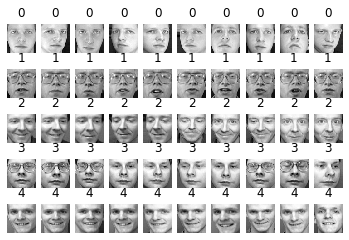

In [11]:
from sklearn.datasets import *
import matplotlib.pyplot as plt
import numpy
import pandas as pd

faces = fetch_olivetti_faces()
print (faces.DESCR)
fig = plt.figure()
for i in range(50):
    subplot = fig.add_subplot(5,10,i+1)
    subplot.matshow(numpy.reshape(faces.data[i],(64,64)),cmap='gray')
    plt.title(faces.target[i])
    plt.axis('off')
plt.show()

In [12]:
faces.data.shape


(400, 4096)

In [13]:
faces.images.shape

(400, 64, 64)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, stratify=faces.target)


KNN : 0.8875 
DT : 0.6500 
SVM : 0.9500 
GaussianNB : 0.8750 
MultinomialNB : 0.8500 


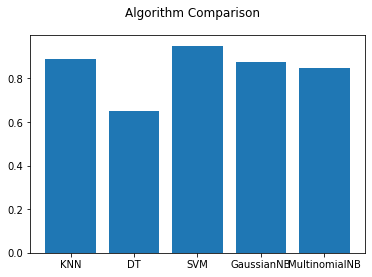

In [15]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('GaussianNB',GaussianNB()))
models.append(('MultinomialNB', MultinomialNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
          clf = model
          clf.fit(X_train, y_train) 
          y_preds = clf.predict(X_test)
          accuracy=accuracy_score(y_test, y_preds)
          results.append(accuracy)
          names.append(name)
          msg = "%s : %.4f " % (name, accuracy)
          print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(names,results)

plt.show()

# Select best model

In [16]:
best_model = SVC()
best_model.fit(X_train, y_train) 

SVC()

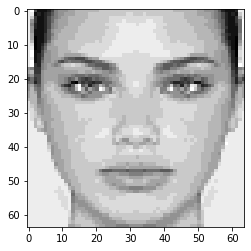

source data in 64x64:
 [[ 2  1 11 ... 13  2  2]
 [ 2  2 14 ... 14  4  2]
 [ 2  4 12 ... 12  6  2]
 ...
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]]
[0]


In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('faceimage.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 64x64:\n",a)

predicted = best_model.predict(a.flatten().reshape(1, -1))
print(predicted)